**pandas demo**

_Евгений Борисов <esborisov@sevsu.ru>_

---

Pandas: Chart Visualization    
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Формат таблиц в pandas   
https://habr.com/ru/post/521894/

In [1]:
import pandas as pd
import numpy as np
from numpy import random as rng

In [2]:
pd.options.display.max_colwidth = 200 # ширина таблицы pandas при печати
np.set_printoptions(precision=2) # вывод на печать до 2 знака

# eurostat

In [7]:
# !pip3 install eurostat

In [8]:
# статистика по странам Евросоюза
# https://ec.europa.eu/eurostat
import eurostat

In [9]:
# список тем в источнике
toc = eurostat.get_toc_df().drop_duplicates()
toc.sample(10)

,title,code,type,last update of data,last table structure change,data start,data end
6280,"Internet facilities, robotics, precision farming and machinery for livestock management in farms by economic size of farm, farm type and NUTS 2 region",EF_MP_DIGI,dataset,2025-12-12T11:00:00+0100,2025-12-12T11:00:00+0100,2023,2023
4781,At-risk-of-poverty rate anchored at a point in time by sex and age,ILC_LI20,dataset,2009-03-27T11:00:00+0100,2023-12-21T23:00:00+0100,1998,2003
2033,Gross production of electricity and derived heat from combustible fuels by type of plant and operator,NRG_IND_PEHCF,dataset,2026-01-15T11:00:00+0100,2025-06-16T11:00:00+0200,1990,2024
2639,Cost of CVT courses by type and size class - % of total labour cost of all enterprises,TRNG_CVT_16S,dataset,2024-06-07T23:00:00+0200,2024-01-03T23:00:00+0100,2005,2020
5751,Education indicators by NUTS 2 region (1998-2012),EDUC_REGIND,dataset,2019-03-15T23:00:00+0100,2024-01-10T11:00:00+0100,1998,2012
1588,Area of wooded land (EFA questionnaire),FOR_AREA_EFA,dataset,2026-01-04T11:00:00+0100,2025-12-18T23:00:00+0100,1990,2024
6155,Importance of barriers met for engaging in international sourcing of activities by sourcing status and economic activity (figures and %) - collection round 2007 - experimental statistics,ISS_BARR,dataset,2010-02-19T11:00:00+0100,2024-10-14T23:00:00+0200,2007,2007
3552,Gross disposable income,TEINA090,dataset,2026-01-19T23:00:00+0100,2026-01-12T23:00:00+0100,2022-Q4,2025-Q3
6645,"Direct investment balance with the rest of the world, ENP-East countries",ENPE_BOP_FDI6,dataset,2025-04-15T23:00:00+0200,2025-04-15T23:00:00+0200,2005,2024
1740,"Mining and quarrying by employment size class (NACE Rev. 1.1, C) (1995-2001)",SBS_SC_2D_MI95,dataset,2016-05-24T23:00:00+0200,2023-12-21T23:00:00+0100,1995,2001


In [10]:
# Animal populations by NUTS 2 regions
df = eurostat.get_data_df('tgs00045')
display(len(df))
df.sample(10)

1313

,freq,animals,unit,geo\TIME_PERIOD,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
515,A,A2300F,THS_HD,PT17,7.84,8.01,8.88,8.90,8.82,8.94,8.43,8.30,8.20,7.50,NaN,NaN
885,A,A4100,THS_HD,BE32,8.09,NaN,NaN,7.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1265,A,A4200,THS_HD,RO22,328.50,361.70,367.80,371.80,377.80,390.40,425.80,426.30,379.50,385.00,342.40,332.20
300,A,A2300F,THS_HD,BE10,0.18,0.28,0.27,0.10,0.21,0.21,0.22,0.21,0.21,0.27,0.26,0.26
1177,A,A4200,THS_HD,FRI3,405.00,403.00,385.00,368.00,369.00,365.69,358.83,369.55,368.33,340.26,323.81,317.62
135,A,A2000,THS_HD,FRY4,29.00,29.00,30.00,31.00,30.83,30.15,29.29,27.21,25.17,24.29,22.95,22.69
523,A,A2300F,THS_HD,PT30,0.27,0.31,0.31,0.27,0.32,0.30,0.30,0.23,0.21,0.22,0.19,0.13
74,A,A2000,THS_HD,EL52,181.50,185.90,157.40,143.10,143.00,138.20,134.50,160.10,161.90,147.70,147.83,143.04
607,A,A3100,THS_HD,DK04,4421.00,4542.00,4551.00,4551.00,4551.00,4476.00,4564.00,4731.00,4645.00,4119.00,4053.00,4068.00
820,A,A3100,THS_HD,RS12,NaN,1324.85,1342.46,1248.66,1220.00,1236.00,1230.00,1261.00,1212.00,1132.38,939.89,1027.25


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   freq             1313 non-null   object 
 1   animals          1313 non-null   object 
 2   unit             1313 non-null   object 
 3   geo\TIME_PERIOD  1313 non-null   object 
 4   2013             994 non-null    float64
 5   2014             953 non-null    float64
 6   2015             977 non-null    float64
 7   2016             1022 non-null   float64
 8   2017             976 non-null    float64
 9   2018             960 non-null    float64
 10  2019             964 non-null    float64
 11  2020             976 non-null    float64
 12  2021             974 non-null    float64
 13  2022             981 non-null    float64
 14  2023             1091 non-null   float64
 15  2024             1098 non-null   float64
dtypes: float64(12), object(4)
memory usage: 164.3+ KB


<Axes: title={'center': 'A / A2300F / THS_HD'}>

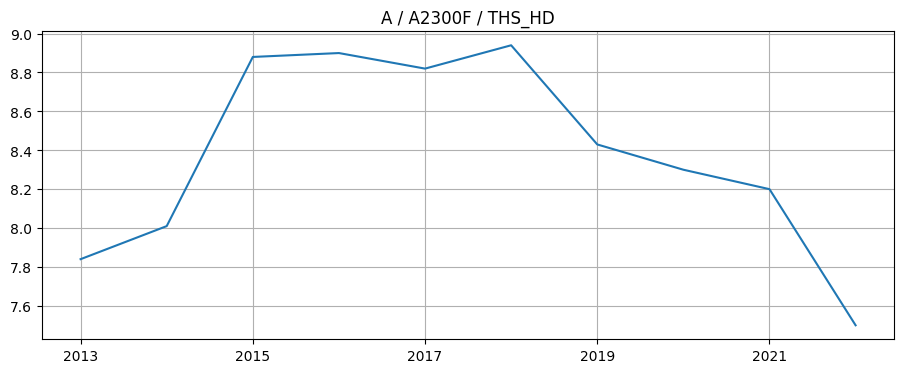

In [12]:
n = rng.randint(len(df)) # выбираем запись
title = ' / '.join( df.iloc[n,:3].to_list() )
df.iloc[n,4:].plot(grid=True,figsize=(11,4), title=title)

# wikipedia

https://en.wikipedia.org/wiki/Demographics_of_India

In [15]:
# !pip3 install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 6.3 MB/s  0:00:00 eta 0:00:01


In [16]:
import requests

url = 'https://en.wikipedia.org/wiki/Demographics_of_India'
headers = { 'User-Agent': 'My User Agent 1.0' }
answer = requests.get(url, headers=headers)
answer.raise_for_status()
tables = pd.read_html( answer.text)
display( len(tables) )

/tmp/ipykernel_37711/241269612.py:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html( answer.text)


49

In [25]:
df = tables[24]
#df = tables[22]
display( df.sample(5) )

,State or UT code,State or UT,Total,Male,Female,Difference
4,5,Uttarakhand,1328844,704769,624075,80694
24,25,Daman and Diu,25880,13556,12314,1242
5,6,Haryana,3297724,1802047,1495677,306370
18,19,West Bengal,10112599,5187264,4925335,261929
30,31,Lakshadweep,7088,3715,3373,342


In [29]:
# df = df[ df['State or UT']!='Total (India)'  ]
# df

In [30]:
display(df.info() )

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State or UT code  35 non-null     object
 1   State or UT       35 non-null     object
 2   Total             35 non-null     int64 
 3   Male              35 non-null     int64 
 4   Female            35 non-null     int64 
 5   Difference        35 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.9+ KB


None

In [31]:
df = df.convert_dtypes()
display(df.info() )

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State or UT code  35 non-null     string
 1   State or UT       35 non-null     string
 2   Total             35 non-null     Int64 
 3   Male              35 non-null     Int64 
 4   Female            35 non-null     Int64 
 5   Difference        35 non-null     Int64 
dtypes: Int64(4), string(2)
memory usage: 2.1 KB


None

<Axes: ylabel='State or UT'>

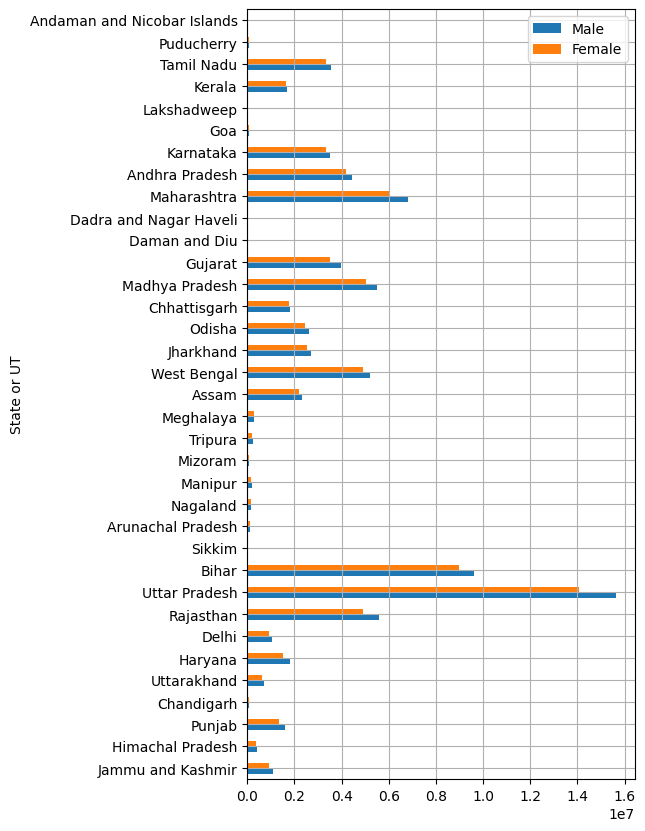

In [32]:
(
    df[['State or UT','Male','Female']]
    .set_index('State or UT')
    .plot.barh(figsize=(5,10),grid=True,)
    # .plot.barh(figsize=(5,10),grid=True, log=True)
)

In [35]:
col = 'Difference'
# df[col] = pd.to_numeric(df[col].str.replace(',','').str.replace('−','-'))

In [36]:
df.style.bar(
    subset=[col],
      align='mid',
      color=['coral', 'yellowgreen'],
      vmin=df[col].min(),
      vmax=df[col].max()
     )

,State or UT code,State or UT,Total,Male,Female,Difference
0,1,Jammu and Kashmir,2008670,1080662,927982,152680
1,2,Himachal Pradesh,763864,400681,363183,37498
2,3,Punjab,2941570,1593262,1348308,244954
3,4,Chandigarh,117953,63187,54766,8421
4,5,Uttarakhand,1328844,704769,624075,80694
5,6,Haryana,3297724,1802047,1495677,306370
6,7,Delhi,1970510,1055735,914775,140960
7,8,Rajasthan,10504916,5580212,4924004,656208
8,9,Uttar Pradesh,29728235,15653175,14075060,1578115
9,10,Bihar,18582229,9615280,8966949,648331


In [37]:
df[['Male','Female']].describe().T

,count,mean,std,min,25%,50%,75%,max
Male,35.0,2370059.685714,3303239.135753,3715.0,93697.5,1080662.0,3535097.5,15653175.0
Female,35.0,2166756.885714,3000401.399059,3373.0,90450.5,927982.0,3340213.5,14075060.0


---

**упражнения**

https://github.com/ajcr/100-pandas-puzzles

---

In [38]:
# # !pip3 install watermark
# # Python package versions used
# %load_ext watermark
# %watermark --python
# %watermark --iversions
# #